<a href="https://colab.research.google.com/github/Data-Scientist400701/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Data_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Terrorism?

# Terrorism is a tactic that has been used by radical groups for decades to achieve their goals. The purpose of terrorism is to create fear and panic in order to establish power and control over a society. Terrorist attacks are not limited to any one type of group, but they are most often carried out by different organization.


## The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.


## Explore and analyze the data to discover key understandings (not limited to these) such as:

1. Which region of the world has faced the most terror attacks?
2. Frequencies of terrorist attacked per year
3. Top 10 Countries affected by terrorist.
4. Which terrorist organization has attacked the most and weapon used and favorite style of attack?
5. What is loss of economic value due to terroism calculated using property damage and ransom paid over the years? (Apart from loss of life)
6. Which terror organization has attacked the most in India?
7. Few motives of different terrorists for attacking various countries. 
8. Which terror organization is more active in last 5 year in the world as well as in india?  






# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading CSV File

In [ ]:
terrorism_df = pd.read_csv('/content/drive/MyDrive/Data science CSV/Terrorism.csv', encoding = 'latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   country_txt       181691 non-null  object 
 3   attacktype1_txt   181691 non-null  object 
 4   targtype1_txt     181691 non-null  object 
 5   gname             181691 non-null  object 
 6   nkill             171378 non-null  float64
 7   nwound            165380 non-null  float64
 8   weaptype1_txt     181691 non-null  object 
 9   ransomamt         1350 non-null    float64
 10  propvalue         38989 non-null   float64
 11  motive            50561 non-null   object 
 12  region_txt        181691 non-null  object 
 13  weapsubtype1_txt  160923 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 19.4+ MB


# Taking necessary columns

In [ ]:
terrorism_df = terrorism_df[['eventid','iyear','country_txt','attacktype1_txt','targtype1_txt','gname','nkill','nwound','weaptype1_txt','ransomamt','propvalue','motive','region_txt','weapsubtype1_txt']]

In [ ]:
terrorism_df.head()

,eventid,iyear,country_txt,attacktype1_txt,targtype1_txt,gname,nkill,nwound,weaptype1_txt,ransomamt,propvalue,motive,region_txt,weapsubtype1_txt
0,197000000001,1970,Dominican Republic,Assassination,Private Citizens & Property,MANO-D,1.0,0.0,Unknown,NaN,NaN,NaN,Central America & Caribbean,NaN
1,197000000002,1970,Mexico,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0,0.0,Unknown,800000.0,NaN,NaN,North America,NaN
2,197001000001,1970,Philippines,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown,NaN,NaN,NaN,Southeast Asia,NaN
3,197001000002,1970,Greece,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,Western Europe,Unknown Explosive Type
4,197001000003,1970,Japan,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,East Asia,NaN


In [ ]:
terrorism_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   country_txt       181691 non-null  object 
 3   attacktype1_txt   181691 non-null  object 
 4   targtype1_txt     181691 non-null  object 
 5   gname             181691 non-null  object 
 6   nkill             171378 non-null  float64
 7   nwound            165380 non-null  float64
 8   weaptype1_txt     181691 non-null  object 
 9   ransomamt         1350 non-null    float64
 10  propvalue         38989 non-null   float64
 11  motive            50561 non-null   object 
 12  region_txt        181691 non-null  object 
 13  weapsubtype1_txt  160923 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 19.4+ MB


In [ ]:
terrorism_df.describe()

,eventid,iyear,nkill,nwound,ransomamt,propvalue
count,1.816910e+05,181691.000000,171378.000000,165380.000000,1.350000e+03,3.898900e+04
mean,2.002705e+11,2002.638997,2.403272,3.167668,3.172530e+06,2.088119e+05
std,1.325957e+09,13.259430,11.545741,35.949392,3.021157e+07,1.552463e+07
min,1.970000e+11,1970.000000,0.000000,0.000000,-9.900000e+01,-9.900000e+01
25%,1.991021e+11,1991.000000,0.000000,0.000000,0.000000e+00,-9.900000e+01
50%,2.009022e+11,2009.000000,0.000000,0.000000,1.500000e+04,-9.900000e+01
75%,2.014081e+11,2014.000000,2.000000,2.000000,4.000000e+05,1.000000e+03
max,2.017123e+11,2017.000000,1570.000000,8191.000000,1.000000e+09,2.700000e+09


## 1. Which region of the world has faced the most terror attacks?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

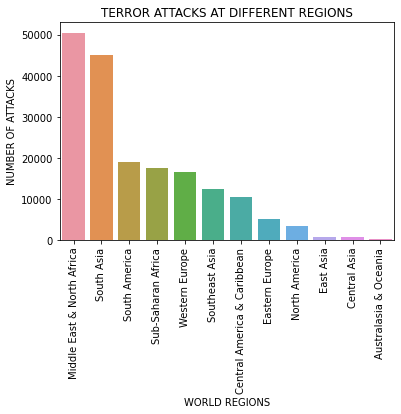

In [ ]:
region_attacks = terrorism_df.sort_values("region_txt", ascending=False)
region_attacks_counts = region_attacks['region_txt'].value_counts()
from seaborn.palettes import color_palette
sns.barplot(list(region_attacks_counts.index),list(region_attacks_counts.values))
plt.rcParams['figure.figsize'] = (13,6)
plt.title('TERROR ATTACKS AT DIFFERENT REGIONS')
plt.ylabel("NUMBER OF ATTACKS")
plt.xlabel("WORLD REGIONS")
plt.xticks(rotation=90)

## <b> Inference:-  

### * Middle east & North Africa are the two regions in the world has been affected the most by Terrorism.

## 2. Frequencies of terrorist attacked per year.

Text(0.5, 0, 'years')

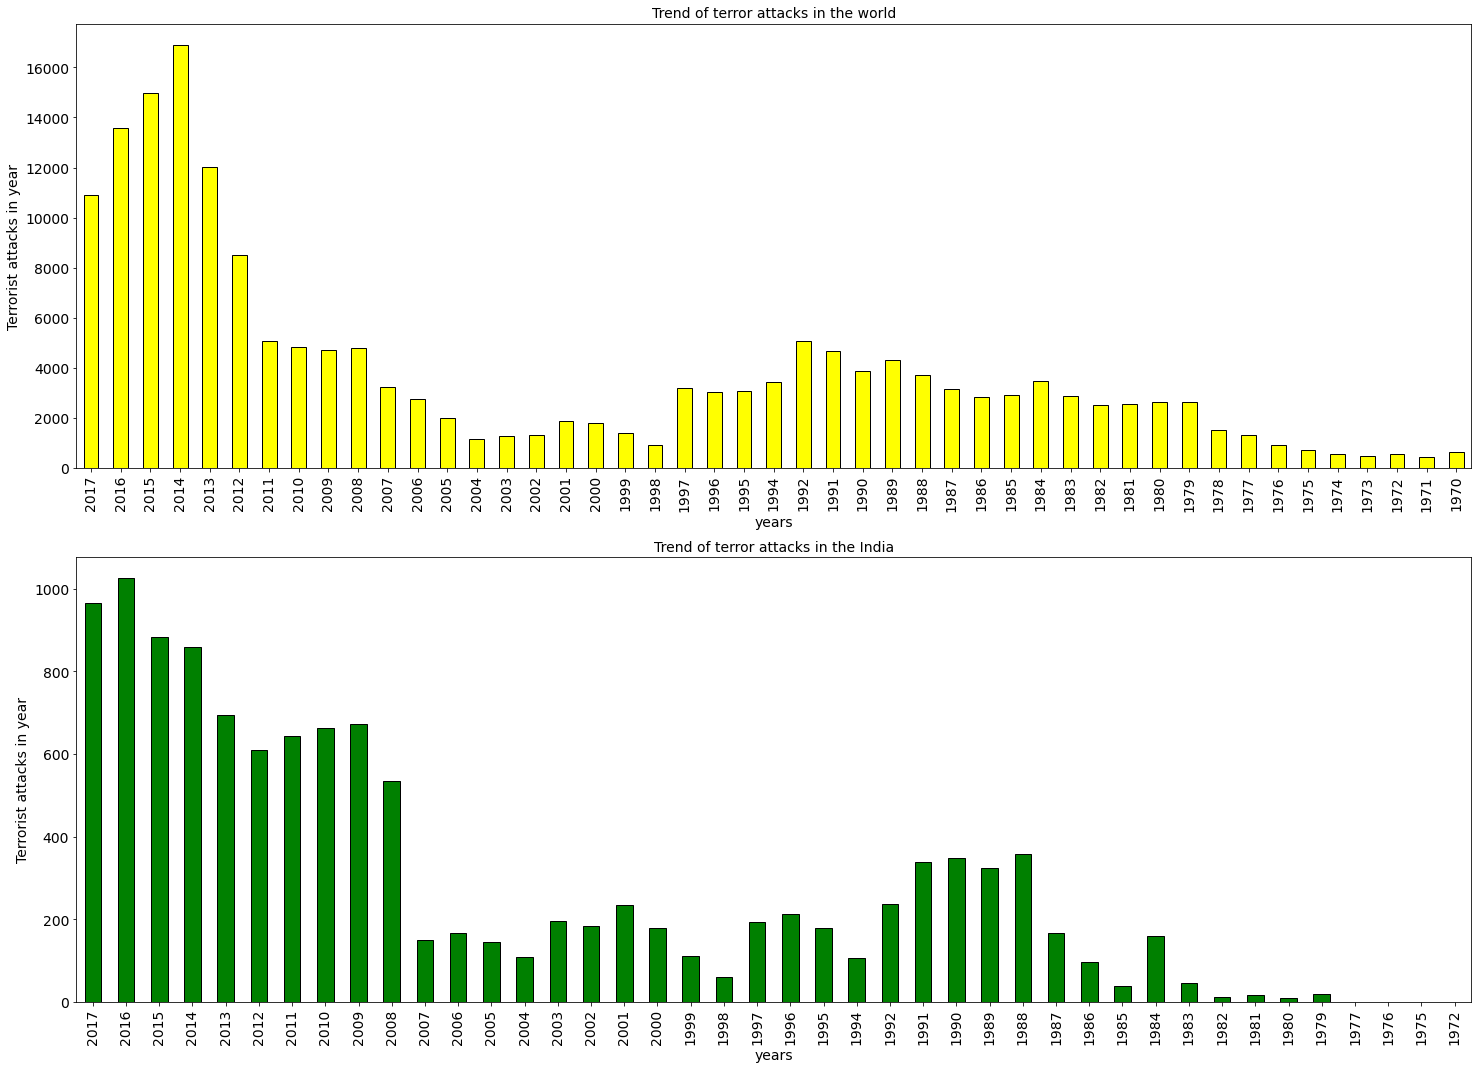

In [ ]:
freq_attacks_w=terrorism_df['iyear'].value_counts().sort_index(ascending=False)

plt.subplots(figsize=(25,18))
plt.subplot(2, 1, 1) 
freq_attacks_w.plot(kind='bar',edgecolor='black',color='yellow',fontsize=14)
plt.title('Trend of terror attacks in the world',fontsize=14)
plt.ylabel('Terrorist attacks in year',fontsize=14)
plt.xlabel('years',fontsize=14)


terrorism_india=terrorism_df[terrorism_df['country_txt']=='India']
freq_attacks_i=terrorism_india['iyear'].value_counts().sort_index(ascending=False)

plt.subplot(2,1,2)
freq_attacks_i.plot(kind='bar',edgecolor='black',color='green',fontsize=14)
plt.title('Trend of terror attacks in the India',fontsize=14)
plt.ylabel('Terrorist attacks in year',fontsize=14)
plt.xlabel('years',fontsize=14)

# <b> Inference:-

### * In 2014 the world has faced the most number of terrorist attack, followed by 2015 & 2016.
### * In 2016 India faced the most number of terrorist attacks , followed by 2017 & 2015



## 3:Top 10 Countries affected by terrorist.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Countries')

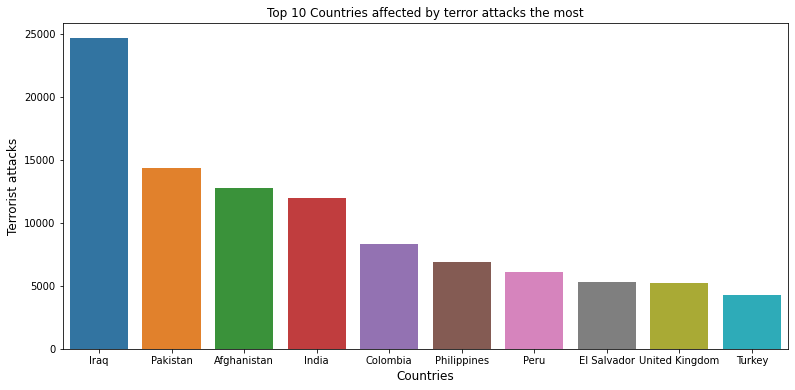

In [ ]:
from seaborn.palettes import color_palette
affected_w=terrorism_df['country_txt'].value_counts()
top_ten_affected=affected_w.iloc[:10]
plt.rcParams['figure.figsize']=(13,6)
sns.barplot(top_ten_affected.index,top_ten_affected.values)
plt.title('Top 10 Countries affected by terror attacks the most',fontsize=12)
plt.ylabel('Terrorist attacks',fontsize=12)
plt.xlabel('Countries',fontsize=12)

## <b> Inference:-
### * By considering the countries, Iraq faced the highest number of terrorist attacks by the years.
### * India is the 4th nation , who faced the maximum number of terrorist attack.

## 4. Which terrorist organization has attacked the most and weapon used and their style of attack?

The organization that conducted most terror attacks is Taliban.


The two weapons of Taliban are ['Unknown Gun Type', 'Unknown Explosive Type'] used [2549, 805] times respectively

The least 4 favorite two weapons of Taliban are:

['Rope or Other Strangling Device', 'Pressure Trigger', 'Poisoning', 'Handgun', 'Hands, Feet, Fists', 'Rifle/Shotgun (non-automatic)', 'Gasoline or Alcohol', 'Time Fuse', 'Unknown Weapon Type', 'Other Gun Type', 'Blunt Object']
 used [23, 21, 19, 14, 6, 5, 4, 3, 2, 1, 1] times respectively

The rest are as follows:



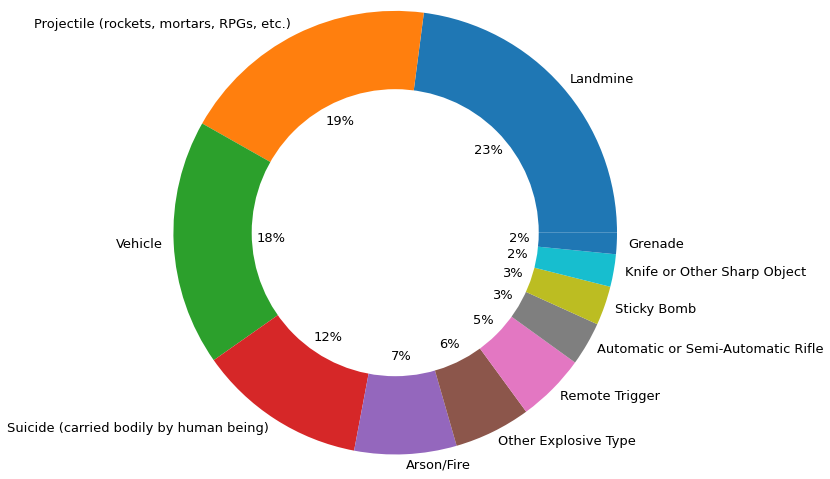

In [ ]:
top_terror_org=terrorism_df.groupby('gname')['eventid'].count().sort_values(ascending=False).reset_index()
top_terror_org_dict=dict(top_terror_org.iloc[1])
print(f"The organization that conducted most terror attacks is {top_terror_org_dict['gname']}.")
print('\n')


taliban_df=terrorism_df[terrorism_df['gname']=='Taliban']
taliban_df_weapons_used=taliban_df['weapsubtype1_txt'].value_counts().reset_index()
count = list(taliban_df_weapons_used['weapsubtype1_txt'])
count1=count[2:13]
count1=np.array(count1)
mylabels = list(taliban_df_weapons_used['index'])
mylabels1=mylabels[2:13]
print(f"The two weapons of {top_terror_org_dict['gname']} are {mylabels[:2]} used {list(count[:2])} times respectively\n")
print(f"The least 4 favorite two weapons of {top_terror_org_dict['gname']} are:\n\n{mylabels[-11:]}\n used {list(count[-11:])} times respectively\n")
print('The rest are as follows:\n')

plt.pie(count1, labels = mylabels1,radius=1.7, autopct='%1.0f%%',pctdistance=0.56,labeldistance=1.05,textprops={'fontsize': 13})
centre_circle = plt.Circle((0, 0), 1.1, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show() 


## <b> Inference:- 
### * The organization that conducted most terror attacks is Taliban.
### * Taliban used Landmine (usage = 23%) followed by Projectile rockets , mortars & RPGs (usage = 19%).

In [ ]:
favorite_style=taliban_df['attacktype1_txt'].value_counts().reset_index()
favorite_style_name=list(favorite_style['index'])
favorite_style_name1=favorite_style_name[:6]
favorite_style_count=list(favorite_style['attacktype1_txt'])
favorite_style_count1=favorite_style_count[:6]

The least popular style of the attacks were['Unarmed Assault', 'Hostage Taking (Barricade Incident)', 'Hijacking'] which was done [33, 19, 13] times respectively




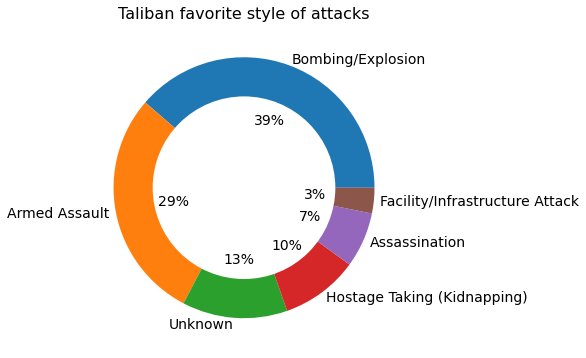

In [ ]:
print(f"The least popular style of the attacks were{favorite_style_name[6:]} which was done {favorite_style_count[6:]} times respectively")
print('\n')
plt.pie(favorite_style_count1, labels = favorite_style_name1,radius=1, autopct='%1.0f%%',pctdistance=0.55,labeldistance=1.05,textprops={'fontsize': 14})
plt.title('Taliban favorite style of attacks',fontsize=16)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show() 


## <b> Inference:- 
### * Bombing/Explosion and Armed Assult are the two major way of attack by Taliban.

## 5.What is loss of economic value due to terroism calculated using property damage and ransom paid over the years? (Apart from loss of life)

([<matplotlib.axis.XTick at 0x7f1552ecd150>,
 <a list of 47 Text major ticklabel objects>)

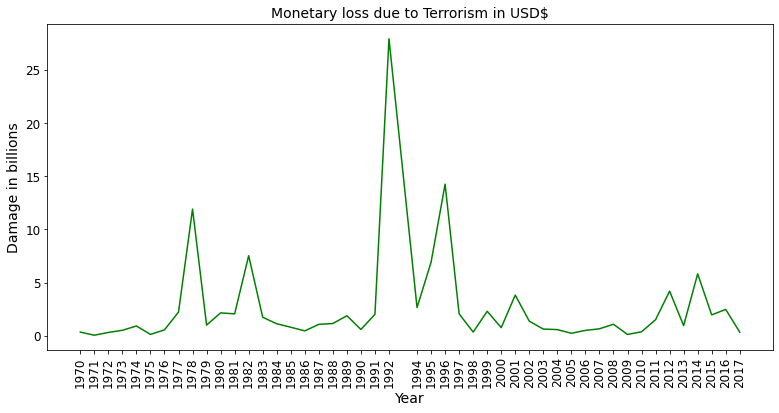

In [ ]:
propvalue=terrorism_df.groupby('iyear')['propvalue'].sum()
ransomvalue=terrorism_df.groupby('iyear')['ransomamt'].sum()
total_sum=(propvalue+ransomvalue)/100000000
total_sum.plot(kind='line',fontsize=12,color='green')
plt.rcParams['figure.figsize']=(14,7)
plt.title('Monetary loss due to Terrorism in USD$',fontsize=14)
plt.ylabel('Damage in billions',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(list(total_sum.index),rotation=90)

##<b> Inference:- 
### * In the year 1992 due to terrorism activities, there are heavy monetary value lost which is more than $25 Billion USD.

## 6. Which terror organization has attacked the most in India?

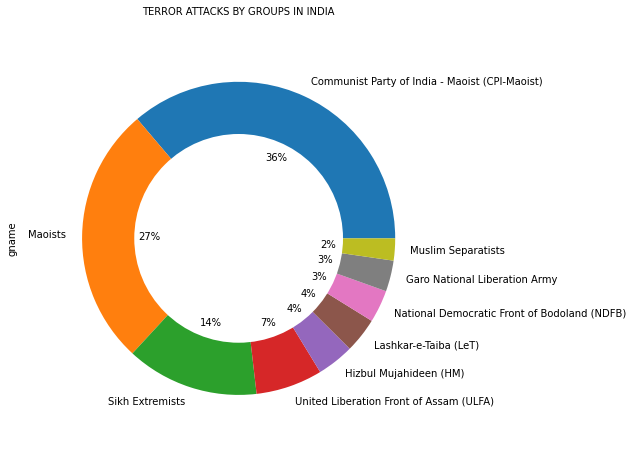


The number of attacks by unidentified terrorist: 1877



In [ ]:
terrorism_in_india = terrorism_df[terrorism_df['country_txt'] == 'India']
group_name_local = terrorism_in_india.sort_values("gname", ascending=False)
group_name_count_l = group_name_local['gname'].value_counts()[1:10]
gn1=group_name_count_l.plot.pie(figsize=(12,8),autopct='%1.0f%%',pctdistance=.57,radius=0.9)
gn1.set_title('TERROR ATTACKS BY GROUPS IN INDIA',fontsize = 10)
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show() 
print(f"\nThe number of attacks by unidentified terrorist: {group_name_count_l [0]}\n")

## <b> Inference:- 
### * Communist Party of India - Moist(CPI-Moist) emerging out to be the top terror group , who operated the most number of terrorist attack in india.
### * The number of attacks by unidentified terrorist: 1877


# 7. Few motives of different terrorists for attacking various countries.

# Most of the motives of terrorists are unknown so we took slice stepping to avoid unknown motives and tried to gathered few motives of terrorist.

In [ ]:
Popular_motive=terrorism_df.groupby('motive')['motive'].count().sort_values(ascending=False)
Popular_motive_text=list(Popular_motive.index)
Popular_motive_count=list(Popular_motive.values)
Popular_motive_tuple=list(zip(Popular_motive_count,Popular_motive_text))[2:18:2]
print('Few motives of Terrorists attacks are: \n')
for i,j in Popular_motive_tuple:
  print(f"Motive: {j} \nIncidents:{i}\n")

Few motives of Terrorists attacks are: 

Motive: The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015. 
Incidents:297

Motive: The specific motive for the attack is unknown or was not reported. 
Incidents:144

Motive: Part of a campaign by Islamic extremists to destabilize Algeria by weakening security forces protecting the 'apostate' Algerian government. 
Incidents:66

Motive: The specific motive is unknown; however, sources suspected that the attack, which targeted members of the Sunni community, may have been part of a larger trend of sectarian violence between Iraq's minority Sunni and majority Shiite communities. 
Incidents:52

Motive: The specific motive is unknown; however, sources noted that parliamentary elections were scheduled for January 5, 2014. Sources also noted that the opposition advocated for citizens to "resist" the elections. 


## 8. Which terror organization is more active in last 5 year in the world as well as in india?

#Creating a database from the year 2013 to 2017

In [ ]:
last_5_yr = terrorism_df.loc[terrorism_df['iyear'] > 2012]
last_5_yr

,eventid,iyear,country_txt,attacktype1_txt,targtype1_txt,gname,nkill,nwound,weaptype1_txt,ransomamt,propvalue,motive,region_txt,weapsubtype1_txt
113299,201301010001,2013,Pakistan,Bombing/Explosion,Police,Unknown,0.0,0.0,Explosives,NaN,NaN,NaN,South Asia,Unknown Explosive Type
113300,201301010002,2013,Iraq,Bombing/Explosion,Private Citizens & Property,Unknown,1.0,5.0,Explosives,NaN,-99.0,NaN,Middle East & North Africa,Vehicle
113301,201301010003,2013,Iraq,Bombing/Explosion,Police,Unknown,0.0,5.0,Explosives,NaN,-99.0,NaN,Middle East & North Africa,Unknown Explosive Type
113302,201301010004,2013,Iraq,Bombing/Explosion,Police,Unknown,0.0,2.0,Explosives,NaN,-99.0,NaN,Middle East & North Africa,Unknown Explosive Type
113303,201301010005,2013,Pakistan,Bombing/Explosion,Private Citizens & Property,Tehrik-i-Taliban Pakistan (TTP),0.0,0.0,Explosives,NaN,NaN,"The specific motive is unknown; however, a pol...",South Asia,Remote Trigger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Armed Assault,Military,Al-Shabaab,1.0,2.0,Firearms,NaN,NaN,NaN,Sub-Saharan Africa,Unknown Gun Type
181687,201712310029,2017,Syria,Bombing/Explosion,Military,Muslim extremists,2.0,7.0,Explosives,NaN,-99.0,NaN,Middle East & North Africa,"Projectile (rockets, mortars, RPGs, etc.)"
181688,201712310030,2017,Philippines,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,Incendiary,NaN,-99.0,NaN,Southeast Asia,Arson/Fire
181689,201712310031,2017,India,Bombing/Explosion,Government (General),Unknown,0.0,0.0,Explosives,NaN,NaN,NaN,South Asia,Grenade


# According to the Last 5 year data , finding the more active terror organization in world.

In [ ]:
group_name_local = last_5_yr.sort_values("gname", ascending=False)
group_name_count = group_name_local['gname'].value_counts()[1:10]
group_name_count

Islamic State of Iraq and the Levant (ISIL)    5613
Taliban                                        5018
Al-Shabaab                                     2727
Boko Haram                                     1842
New People's Army (NPA)                        1351
Maoists                                        1164
Houthi extremists (Ansar Allah)                1048
Kurdistan Workers' Party (PKK)                  941
Al-Qaida in the Arabian Peninsula (AQAP)        690
Name: gname, dtype: int64

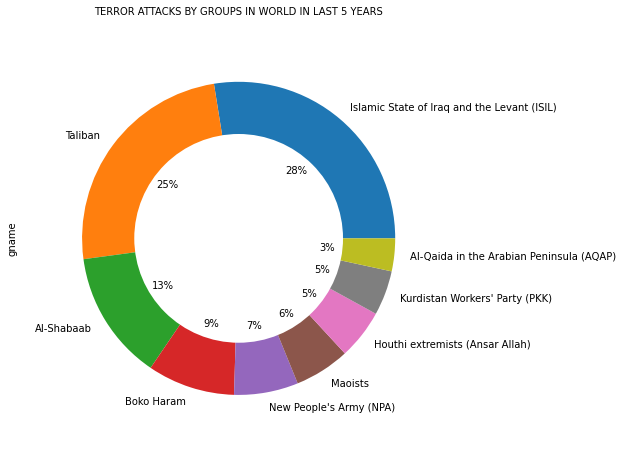

The number of attacks by unidentified terrorist: 5613



In [ ]:
gn1=group_name_count.plot.pie(figsize=(12,8),autopct='%1.0f%%',pctdistance=.57,radius=0.9)
gn1.set_title('TERROR ATTACKS BY GROUPS IN WORLD IN LAST 5 YEARS',fontsize = 10)
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show() 
print(f"The number of attacks by unidentified terrorist: {group_name_count [0]}\n")

# According our data , finding the most active terror organization in india.

In [ ]:
groups_attacked_in_india_in_last_5_yr = last_5_yr[last_5_yr['country_txt'] == 'India']
group_name_local_in = groups_attacked_in_india_in_last_5_yr.sort_values("gname",ascending=False)
group_name_count_in = group_name_local_in['gname'].value_counts()[1:10]
group_name_count_in

Maoists                                           1163
Communist Party of India - Maoist (CPI-Maoist)     407
Hizbul Mujahideen (HM)                             108
Garo National Liberation Army                      105
United Liberation Front of Assam (ULFA)             89
Lashkar-e-Taiba (LeT)                               80
National Democratic Front of Bodoland (NDFB)        79
Gorkha Janmukti Morcha (GJM)                        67
People's Liberation Army (India)                    56
Name: gname, dtype: int64

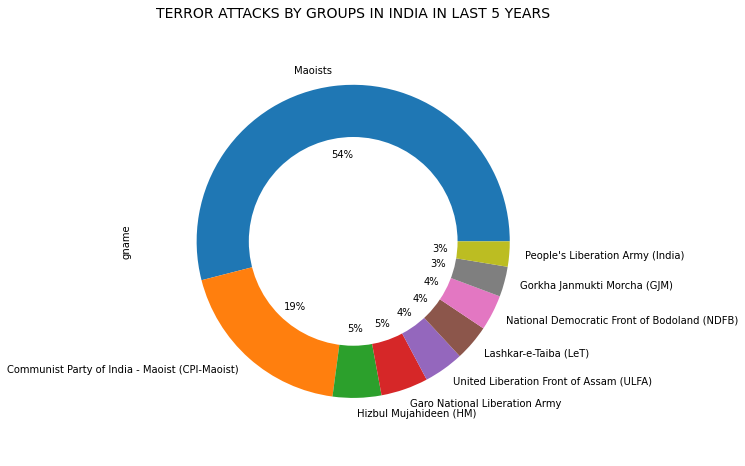

The number of attacks by unidentified terrorist: 1163



In [ ]:
gn2=group_name_count_in.plot.pie(figsize=(12,8),autopct='%1.0f%%',pctdistance=.56,radius=0.9)
gn2.set_title('TERROR ATTACKS BY GROUPS IN INDIA IN LAST 5 YEARS',fontsize = 14)
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show() 
print(f"The number of attacks by unidentified terrorist: {group_name_count_in [0]}\n")

## Inference:-
# * Islamic state of Iraq and the levant(ISIL) turn out to be most active terror organization in the world , while the number of attacks by unidentified terrorist: 5613
# * Moists turn out to be most active terror organization in India, While the number of attacks by unidentified terrorist: 1163


# <b>Conclusions

### 1. Middle east & North Africa are the two regions in the world that has been affected the most by Terrorism.
###2. In 2014 the world has faced the most number of terrorist attack, followed by 2015 and 2016.
### 3. In 2016 India faced the most number of terrorist attacks, followed by 2017 and 2015
### 4. By considering the countries, Iraq faced the highest number of terrorist attacks by the years.
###5. India is the 4th nation, who faced the maximum number of terrorist attack.
###6. The organization that conducted most terror attacks is Taliban.
###7. Taliban used weapons like Landmine (usage = 23%) followed by Projectile rockets, mortars and RPGs (usage = 19%).
###8. Bombing/Explosion and Armed Assult are the two major way of attack by Taliban.
###9. In the year 1992 due to terrorism activities, there are heavy monetary value lost which is more than $25 Billion USD.
### 10. Communist Party of India - Moist(CPI-Moist) emerging out to be the top terror groups, who operated the most number of terrorist attacks in india.
### 11.Islamic state of Iraq and the levant(ISIL) turn out to be most active terror organization in the world , while the number of attacks by unidentified terrorist: 5613
### 12.Moists turn out to be most active terror organization in India, While the number of attacks by unidentified terrorist: 1163